In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
train_datagenerator = ImageDataGenerator(rescale=1./255,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         vertical_flip=True,
                                         horizontal_flip=True)

In [3]:
training_set = image_datagenerator.flow_from_directory(r"C:\Users\chakr\Downloads\monkey\training\training",
                                                       target_size=(224,224),
                                                       class_mode="categorical",
                                                       batch_size=16)

Found 1098 images belonging to 10 classes.


In [16]:
test_datagenerator = ImageDataGenerator(rescale=1./255)
testing_set = test_datagenerator.flow_from_directory(r"C:\Users\chakr\Downloads\monkey\validation\validation",
                                                  target_size=(224,224),
                                                  class_mode="categorical",
                                                  batch_size=(16))


Found 272 images belonging to 10 classes.


In [17]:
cnn = tf.keras.models.Sequential()


cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation="relu",input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3,activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3))


cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))
cnn.add(tf.keras.layers.Dense(units=10,activation="softmax"))

In [22]:
cnn.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["Accuracy"])
history = cnn.fit(training_set,validation_data=testing_set,epochs=10)

Epoch 1/10
69/69 [==============================] - 38s 542ms/step - loss: 0.8817 - Accuracy: 0.6776 - val_loss: 1.0776 - val_Accuracy: 0.6434
Epoch 2/10
69/69 [==============================] - 41s 597ms/step - loss: 0.8009 - Accuracy: 0.7168 - val_loss: 1.2714 - val_Accuracy: 0.6360
Epoch 3/10
69/69 [==============================] - 41s 600ms/step - loss: 0.7945 - Accuracy: 0.7113 - val_loss: 1.0370 - val_Accuracy: 0.6691
Epoch 4/10
69/69 [==============================] - 42s 605ms/step - loss: 0.7709 - Accuracy: 0.7240 - val_loss: 0.9275 - val_Accuracy: 0.7022
Epoch 5/10
69/69 [==============================] - 41s 603ms/step - loss: 0.6674 - Accuracy: 0.7678 - val_loss: 0.9842 - val_Accuracy: 0.6875
Epoch 6/10
69/69 [==============================] - 42s 614ms/step - loss: 0.6364 - Accuracy: 0.7732 - val_loss: 1.0854 - val_Accuracy: 0.6544
Epoch 7/10
69/69 [==============================] - 43s 619ms/step - loss: 0.6415 - Accuracy: 0.7851 - val_loss: 0.9879 - val_Accuracy: 0.7022

In [26]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 74, 74, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [27]:
history.model.save(r"D:\models\model-10.h5")

In [73]:
model = tf.keras.models.load_model(r"D:\models\model-10.h5")

Text(0, 0.5, 'Accuracy')

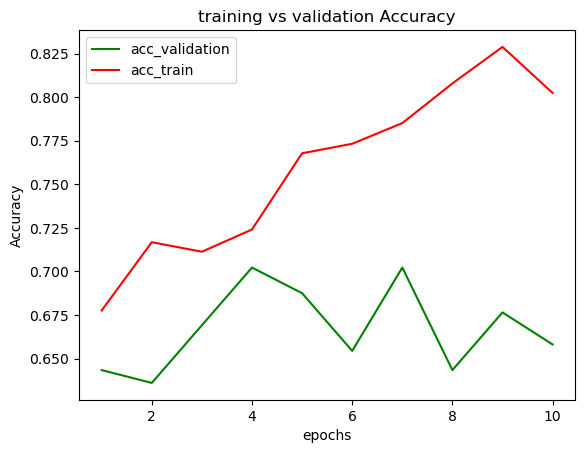

In [74]:
import matplotlib.pyplot as plt
acc_train=history.history["Accuracy"]
acc_val=history.history["val_Accuracy"]
epochs=range(1,11)
plt.plot(epochs,acc_val,'g',label="acc_validation")
plt.plot(epochs,acc_train,'r',label="acc_train")
plt.title("training vs validation Accuracy")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [99]:
import numpy as np
import pandas as pd
from PIL import Image
import os
from tensorflow.keras.preprocessing import image

In [100]:
txt = pd.read_csv(r"C:\Users\chakr\Downloads\monkey\monkey_labels.txt")

In [101]:
txt

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


1/1 [==============================] - 0s 27ms/step


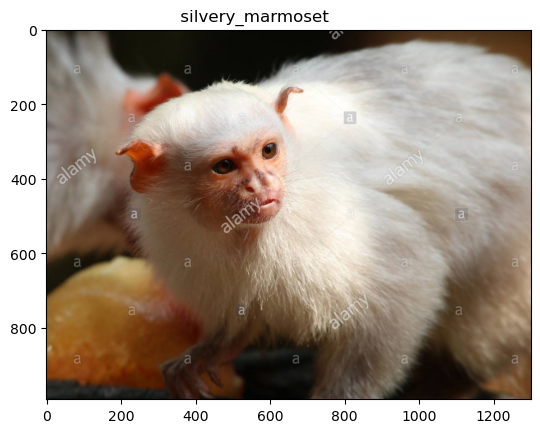

In [103]:
test_image=(r"C:\Users\chakr\Downloads\monkey\validation\validation\n6\n604.jpg")
open_image = Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
result = np.argmax(result)
name = txt.iloc[result]
name =name.iloc[2]
plt.imshow(open_image)
plt.title(name)
plt.show()

1/1 [==============================] - 0s 32ms/step


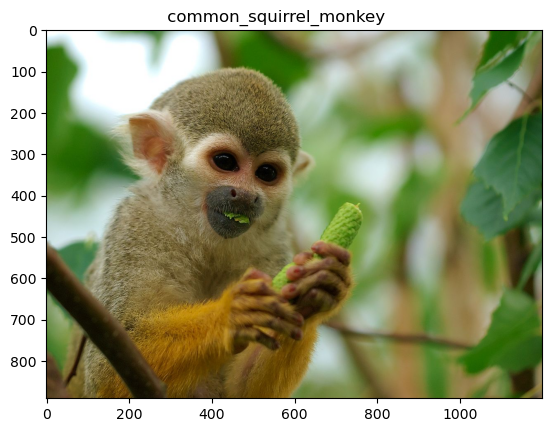

In [108]:
test_image=(r"C:\Users\chakr\Downloads\monkey\validation\validation\n7\n7014.jpg")
open_image = Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image = test_image/255
test_image = np.expand_dims(test_image,axis=0)
result = model.predict(test_image)
result = np.argmax(result)
name = txt.iloc[result]
name =name.iloc[2]
plt.imshow(open_image)
plt.title(name)
plt.show()